# 【pandas】groupbyでデータフレームをまとめる方法

## サンプルデータの作成

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = DataFrame({'C1':["A","B","B","C","C"],
               'C2':["TKO","HKD","OSK","CBA","TKO"],
               'data1':np.random.randn(5),
               'data2':np.random.randn(5)})

In [3]:
df

,C1,C2,data1,data2
0,A,TKO,-1.191208,0.646622
1,B,HKD,-1.530322,-0.990311
2,B,OSK,-2.323434,-1.357766
3,C,CBA,1.264419,2.082788
4,C,TKO,-0.547709,-1.349788


## groupbyの使い方

### 基本的な使い方

In [4]:
g1 = df.groupby("C1")
g1

In [5]:
g1.sum()

,data1,data2
C1,,
A,-1.191208,0.646622
B,-3.853756,-2.348077
C,0.716710,0.733000


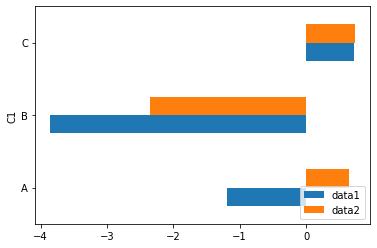

In [6]:
g1.sum().plot(kind="barh")
plt.legend(loc="lower right")

### 複数のグループ

In [7]:
g2 = df.groupby(["C1","C2"])
g2.sum()

data1     data2
C1 C2                     
A  TKO -1.191208  0.646622
B  HKD -1.530322 -0.990311
   OSK -2.323434 -1.357766
C  CBA  1.264419  2.082788
   TKO -0.547709 -1.349788

<AxesSubplot:ylabel='C1,C2'>

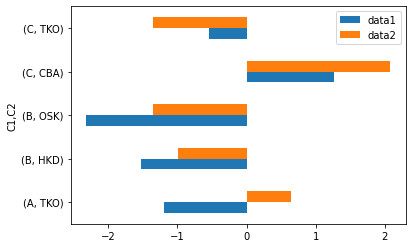

In [8]:
g2.sum().plot(kind="barh")

### カラムの範囲の指定方法

In [9]:
g3 = df.groupby(["C1","C2"])[['data1']]
g3.mean()

data1
C1 C2           
A  TKO -1.191208
B  HKD -1.530322
   OSK -2.323434
C  CBA  1.264419
   TKO -0.547709

### インデックスにしない場合
引数としてas_index=Falseとする

In [10]:
g4 = df.groupby(["C1","C2"], as_index=False)
g4.mean()

,C1,C2,data1,data2
0,A,TKO,-1.191208,0.646622
1,B,HKD,-1.530322,-0.990311
2,B,OSK,-2.323434,-1.357766
3,C,CBA,1.264419,2.082788
4,C,TKO,-0.547709,-1.349788


### 組み込み関数の種類

<table>
  <tbody>
    <tr>
      <td>関数</td>
      <td>説明</td>
    </tr>
    <tr>
      <td>mean()</td>
      <td>平均</td>
    </tr>
    <tr>
      <td>sum()</td>
      <td>合計</td>
    </tr>
    <tr>
      <td>size()</td>
      <td>グループの大きさ</td>
    </tr>
    <tr>
      <td>count()</td>
      <td>グループのデータ個数</td>
    </tr>
    <tr>
      <td>std()</td>
      <td>標準偏差</td>
    </tr>
    <tr>
      <td>describe()</td>
      <td>グループ内の統計量</td>
    </tr>
    <tr>
      <td>first()</td>
      <td>グループ内の先頭</td>
    </tr>
    <tr>
      <td>last()</td>
      <td>グループ内の最後</td>
    </tr>
          <td>min()</td>
      <td>最小値</td>
    </tr>
    <tr>
      <td>max()</td>
      <td>最大値</td>
    </tr>
  </tbody>
</table>

## 任意の処理をする

In [11]:
g5 = df.groupby(["C1","C2"]).agg(np.max)
g5

data1     data2
C1 C2                     
A  TKO -1.191208  0.646622
B  HKD -1.530322 -0.990311
   OSK -2.323434 -1.357766
C  CBA  1.264419  2.082788
   TKO -0.547709 -1.349788

In [12]:
g6 = df.groupby(["C1","C2"]).agg([np.max, np.min])
g6

data1               data2          
            amax      amin      amax      amin
C1 C2                                         
A  TKO -1.191208 -1.191208  0.646622  0.646622
B  HKD -1.530322 -1.530322 -0.990311 -0.990311
   OSK -2.323434 -2.323434 -1.357766 -1.357766
C  CBA  1.264419  1.264419  2.082788  2.082788
   TKO -0.547709 -0.547709 -1.349788 -1.349788

In [13]:
def max_func(x):
    return max(x)

g7 =  df.groupby(["C1","C2"]).agg(max_func)
g7

data1     data2
C1 C2                     
A  TKO -1.191208  0.646622
B  HKD -1.530322 -0.990311
   OSK -2.323434 -1.357766
C  CBA  1.264419  2.082788
   TKO -0.547709 -1.349788